In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
# Charger le jeu de données
data = pd.read_csv('diabetes.csv', delimiter=',')
df = data.copy()
df.head(10)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

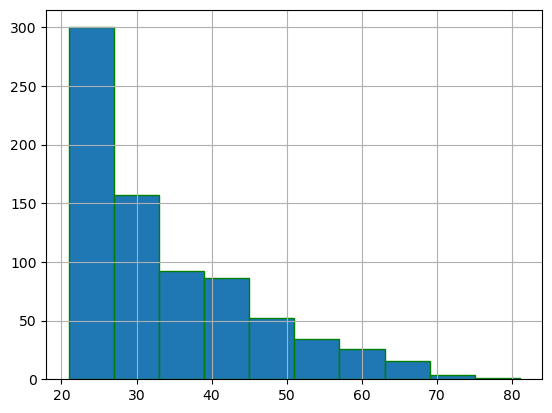

In [11]:
df["Age"].hist(edgecolor = "green");
df.isnull().sum()


<Axes: >

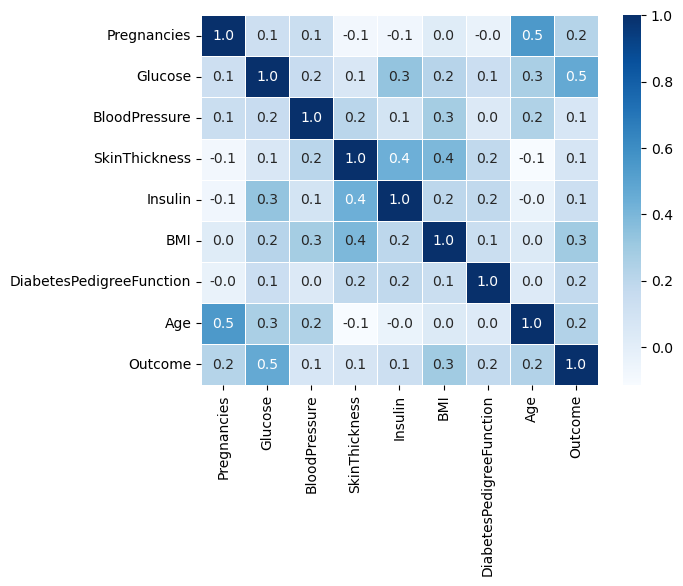

In [12]:

sns.heatmap(df.corr(),annot = True,fmt='0.1f',linewidth=.5,cmap = 'Blues')


In [13]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X = df.iloc[:, :-1].values
# X = df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X = df.drop('Outcome', axis=1)
print(X.shape)
y = df.iloc[:, -1].values
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'], test_size=0.33,random_state=0)


(768, 8)
(768,)


In [14]:
# Standardiser les caractéristiques en utilisant StandardScaler
X_train_scaled = X_train.copy()
X_train_scaled = StandardScaler().fit_transform(X_train_scaled)

X_test_scaled = X_test.copy()
X_test_scaled = StandardScaler().fit_transform(X_test_scaled)

In [15]:
# Construire le modèle
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(8, ), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
import json

try:
    f = open("model_first_ml.joblib", "r")
    model = joblib.load('model_first_ml.joblib')
    with open('history.json', 'r') as h:
        history = json.load(h)
except Exception as e:
    # Entraîner le modèle
    history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

    joblib.dump(model, 'model_first_ml.joblib')

    with open('history.json', 'w') as h:
        json.dump(history, h)



In [34]:
history

{'loss': [0.4773564636707306,
  0.4774349331855774,
  0.4774504601955414,
  0.4774361550807953,
  0.47748956084251404,
  0.4775170683860779,
  0.47743773460388184,
  0.4774603545665741,
  0.47748589515686035,
  0.4774428904056549,
  0.47753942012786865,
  0.47743287682533264,
  0.4773210883140564,
  0.4773697257041931,
  0.477385014295578,
  0.4773704707622528,
  0.4773350954055786,
  0.47737234830856323,
  0.4773609936237335,
  0.47736096382141113,
  0.47751936316490173,
  0.47743797302246094,
  0.4773944318294525,
  0.4774543046951294,
  0.4773569405078888,
  0.47739866375923157,
  0.47741997241973877,
  0.477376252412796,
  0.47744452953338623,
  0.477461040019989,
  0.4773581922054291,
  0.4774906039237976,
  0.4773690402507782,
  0.4774525761604309,
  0.4774279296398163,
  0.4774346351623535,
  0.47740310430526733,
  0.4774461090564728,
  0.47735926508903503,
  0.47748124599456787,
  0.47739896178245544,
  0.4773481786251068,
  0.4774358868598938,
  0.477446973323822,
  0.47748568

In [23]:
model = joblib.load('model_first_ml.joblib')

In [24]:
model.evaluate(X_train_scaled, y_train)


17/17 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7685


[0.47731298208236694, 0.768482506275177]

In [25]:
# Évaluer le modèle
model.evaluate(X_test_scaled, y_test)

# il n'ya pas **d'overfitting** car le score de test est meilleur que le score d'entrainement
# mais le loss de train est meilleur que le loss de test


8/8 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7913


[0.4627486765384674, 0.7913385629653931]

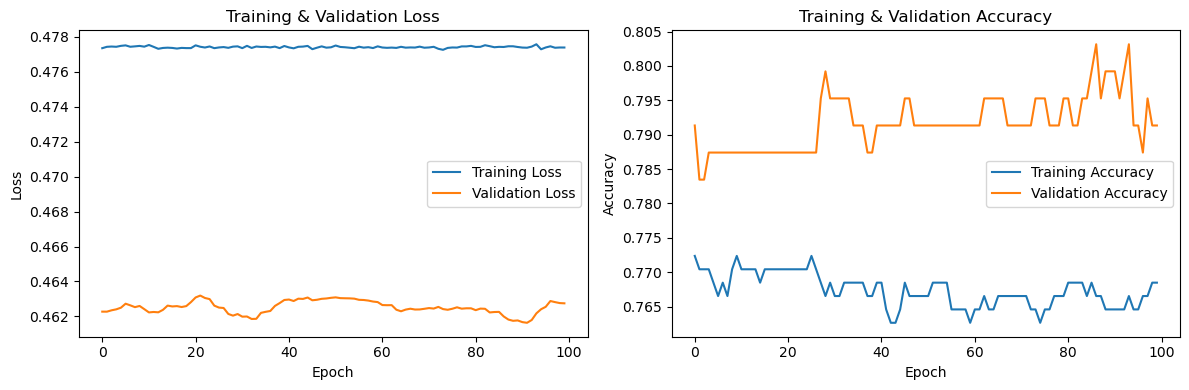

In [35]:
plt.figure(figsize=(12, 4))


# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Faire des prédictions
predictions = model.predict(X_test_scaled)

8/8 [==============================] - 0s 5ms/step


In [ ]:
predictions

array([[0.9682584 ],
       [0.16479196],
       [0.08946187],
       [0.66602427],
       [0.11251044],
       [0.03373908],
       [0.78973943],
       [0.87692386],
       [0.3900298 ],
       [0.39318085],
       [0.60674024],
       [0.9704915 ],
       [0.29636145],
       [0.1635925 ],
       [0.1269576 ],
       [0.15053128],
       [0.88975793],
       [0.0213059 ],
       [0.45110694],
       [0.25085613],
       [0.69859767],
       [0.44624498],
       [0.1751218 ],
       [0.06262568],
       [0.04558555],
       [0.35663626],
       [0.04070294],
       [0.937976  ],
       [0.10485287],
       [0.14200467],
       [0.49364313],
       [0.24528848],
       [0.09368759],
       [0.45801446],
       [0.0890537 ],
       [0.7384453 ],
       [0.51059204],
       [0.08678869],
       [0.31712806],
       [0.764907  ],
       [0.27892694],
       [0.22845666],
       [0.15771054],
       [0.849333  ],
       [0.7763272 ],
       [0.00684237],
       [0.07782608],
       [0.199

In [ ]:
# Obtenir les poids et les biais du modèle
coef, intercept = model.get_weights()
print(f"Coeficients : {coef}, Intercept : {intercept}")

Coeficients : [[ 0.36155644]
 [ 1.0929868 ]
 [-0.1958638 ]
 [ 0.06901234]
 [-0.13056032]
 [ 0.70386344]
 [ 0.2833891 ]
 [ 0.23924464]], Intercept : [-0.841364]


In [ ]:

# Creating a new data point
new_data_point = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [85],
    'BloodPressure': [66],
    'SkinThickness': [29],
    'Insulin': [0],
    'BMI': [26.6],
    'DiabetesPedigreeFunction': [0.351],
    'Age': [31]
})

# Standardizing the new data point using the same scaler
new_data_point_scaled = StandardScaler().fit(X_train).transform(new_data_point)

# Making a prediction
prediction = model.predict(new_data_point_scaled)

prediction = (prediction >= 0.5).astype(int)

# Displaying the prediction
print("Prediction:", "La personne est diabétique" if prediction[0][0] > 0.5 else "La personne n'est pas diabétique")


1/1 [==============================] - 0s 79ms/step
Prediction: La personne n'est pas diabétique
